In [2]:
import os
os.getcwd()

'C:\\Users\\ishan'

In [3]:
path=r"C:\Users\ishan\Downloads\Sales_Data\Sales_Data"


files=[file for file in os.listdir(path) if not file.startswith('.')] #startswith??

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
import pandas as pd
all_month_data= pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+"/"+file)
    all_month_data=pd.concat([all_month_data,current_data],ignore_index=True)

    
all_month_data.tail()
    
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [5]:
nan_df= all_month_data[all_month_data.isna().any(axis=1)]

display(nan_df)
nan_df.shape

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


(545, 6)

In [6]:
all_data= all_month_data.dropna(how="all")  #drop rows having null is any column
#DataFrame.dropna(axis,how,thresh,subset,inplace)
#axis= 0,1  'index','column'

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:

all_data.shape

(186305, 6)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or'] 
# Means we need to remove rows having Date mention as string "Order Date".We expect actual date in date column.
display(all_data.shape)

(185950, 6)

In [10]:
type(all_data['Quantity Ordered'])

pandas.core.series.Series

In [11]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [12]:
all_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [13]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [14]:
def get_city(address):
    return address.split(",")[1].strip(" ")  # strip is use to remove the space before/after

def get_state(address):
    return address.split(",")[2].split(" ")[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [15]:
all_data['sales']= all_data['Quantity Ordered'].astype('int') * all_data['Price Each']
all_data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185950, dtype: float64

Month wise sales.

In [16]:
temp=all_data.groupby(['month']).sum('sales')
temp

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Month wise sales using bar chart

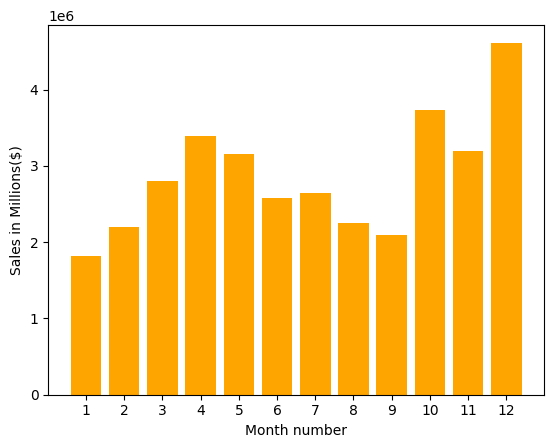

In [30]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months,all_data.groupby(['month']).sum()['sales'],color='orange')
plt.xticks(months)
plt.ylabel('Sales in Millions($)')
plt.xlabel('Month number')
plt.show()

In [18]:
all_data.groupby(['City']).sum('sales')

,Quantity Ordered,Price Each,month,sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [19]:
all_cities_name= [city for city, df in all_data.groupby(['City'])]
all_cities_name

[('Atlanta  (GA)',),
 ('Austin  (TX)',),
 ('Boston  (MA)',),
 ('Dallas  (TX)',),
 ('Los Angeles  (CA)',),
 ('New York City  (NY)',),
 ('Portland  (ME)',),
 ('Portland  (OR)',),
 ('San Francisco  (CA)',),
 ('Seattle  (WA)',)]

In [20]:
cities=[]

for city in all_cities_name:
    cities.append(city[0])

cities  

['Atlanta  (GA)',
 'Austin  (TX)',
 'Boston  (MA)',
 'Dallas  (TX)',
 'Los Angeles  (CA)',
 'New York City  (NY)',
 'Portland  (ME)',
 'Portland  (OR)',
 'San Francisco  (CA)',
 'Seattle  (WA)']

City wise sales using bar chart.

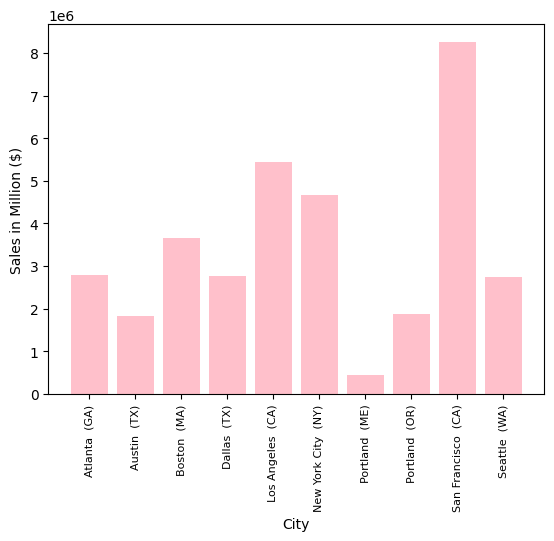

In [29]:
import matplotlib.pyplot as plt



plt.bar(cities,all_data.groupby(['City']).sum()['sales'],color='pink')
plt.ylabel('Sales in Million ($)')
plt.xlabel('City')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()


In [22]:
all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['minute']=pd.to_datetime(all_data['Order Date']).dt.minute
all_data['count']=1
all_data.tail()

C:\Users\ishan\AppData\Local\Temp\ipykernel_8656\1174057860.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\ishan\AppData\Local\Temp\ipykernel_8656\1174057860.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['minute']=pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales,hour,minute,count
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97,20,56,1
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00,16,0,1
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00,7,39,1
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99,17,30,1
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,San Francisco (CA),11.95,0,18,1


In [23]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]



In [24]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2= df[['Order ID','Grouped']].drop_duplicates()

df2

C:\Users\ishan\AppData\Local\Temp\ipykernel_8656\722176597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [25]:
from itertools import combinations
from collections import Counter # Contain map, reduce and counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    #display(Counter(combinations(row_list, 2)))
    count.update(Counter(combinations(row_list, 2)))

count


Counter({('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('iPhone', 'Wired Headphones'): 447,
         ('Google Phone', 'Wired Headphones'): 414,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('USB-C Charging Cable', 'Wired Headphones'): 160,
         ('Vareebadd Phone', 'Wired Headphones'): 143,
         ('Lightning Charging Cable', 'Wired Headphones'): 92,
         ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
         ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
         ('Lightning Charging Cable'

Most common products purchased?

In [26]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most? Why do you think it sold the most?

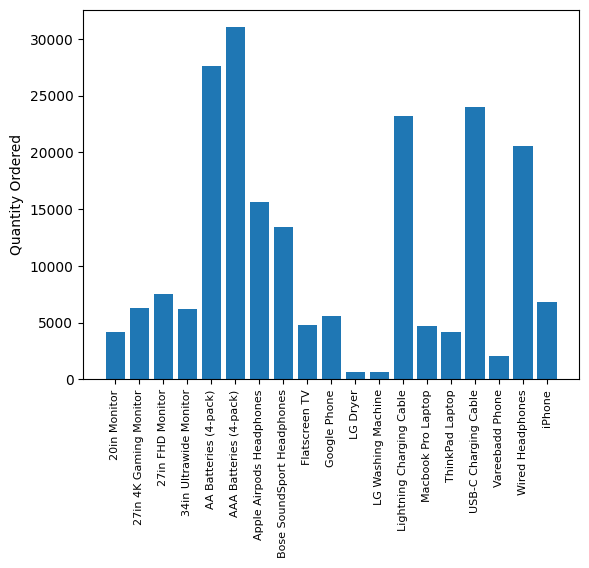

In [31]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
keys

plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.show()


What products are ordered most at which price?

C:\Users\ishan\AppData\Local\Temp\ipykernel_8656\2060510089.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\ishan\AppData\Local\Temp\ipykernel_8656\2060510089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


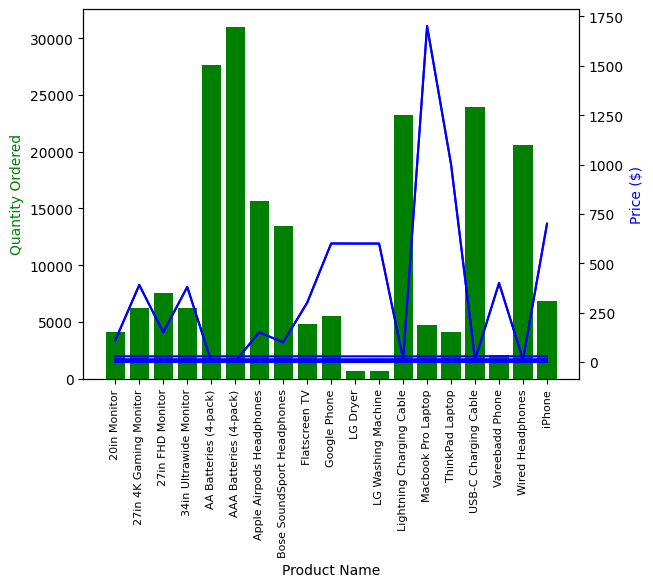

In [28]:
prices = all_data.groupby('Product').mean('Price Each') 

fig, ax1 = plt.subplots()

ax2= ax1.twinx()  ##
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()